<a href="https://colab.research.google.com/github/41815062/python/blob/main/%ED%8C%8C%EC%A3%BC%EC%8B%9C_%EC%95%BC%EB%8B%B9%EB%8F%99_%EC%98%A4%ED%94%BC%EC%8A%A4%ED%85%94_%EC%A0%84%EC%9B%94%EC%84%B8_API_%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#오피스텔 전월세 자료 시각화

#XML LOAD

In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

url = 'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcOffiRent'
para = {'serviceKey': 'cyjQqZuuvujGyWNxhqSI5/z12wzZRGGnaNCfsc4S0rUMyWbqesfXWl5NUdqSNpVNHL3h1n48N/GrO0Ekzw1nBg==', 'LAWD_CD': '41480', 'DEAL_YMD': '202305'}

res = requests.get(url, params=para)
xml_data = res.content

# XML 파싱
root = ET.fromstring(xml_data)
items = root.findall('.//item')

# 데이터 추출 및 저장
data = []
for item in items:
    row = {}
    for child in item:
        row[child.tag] = child.text
    data.append(row)

df = pd.DataFrame(data)

# 데이터 출력
print(df)


   갱신요구권사용  건축년도 계약구분         계약기간     년                단지      법정동  보증금  시군구  \
0           2021   신규  23.05~25.05  2023           천년가 골든뷰      금촌동  500  파주시   
1           2020   신규  23.05~24.05  2023            금촌 아르젠      금촌동  300  파주시   
2           2020   신규  23.05~24.05  2023       파주 금촌 에이스큐브      금촌동  500  파주시   
3           2019   갱신  23.05~24.02  2023           센트럴파크리움      야당동  300  파주시   
4           2018   신규  23.05~24.05  2023     운정유미어스2차 오피스텔      야당동  500  파주시   
..     ...   ...  ...          ...   ...               ...      ...  ...  ...   
68          2019   신규  23.05~24.05  2023  뚱발 트랜스포머420 오피스텔  문산읍 당동리  300  파주시   
69          2019   신규  23.05~24.05  2023  뚱발 트랜스포머420 오피스텔  문산읍 당동리  500  파주시   
70          2019   신규  23.05~24.05  2023  뚱발 트랜스포머420 오피스텔  문산읍 당동리  500  파주시   
71          2012   신규  23.05~24.05  2023             기가타운빌  문산읍 내포리  300  파주시   
72          2016   신규  23.05~24.05  2023              오딧세이  월롱면 덕은리  300  파주시   

    월  월세   일   전용면적 종전계약보증

In [2]:
df.to_excel('파주시 오피스텔 전월세 데이터.xlsx')

#한글 처리

In [1]:
# 방법 1 )) 코랩 한글 깨짐 현상, 폰트 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 4s (2,697 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [21]:
# 방법 2
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [22]:
# 방법 3
from matplotlib import font_manager , rc
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

#Surface Officetel Data

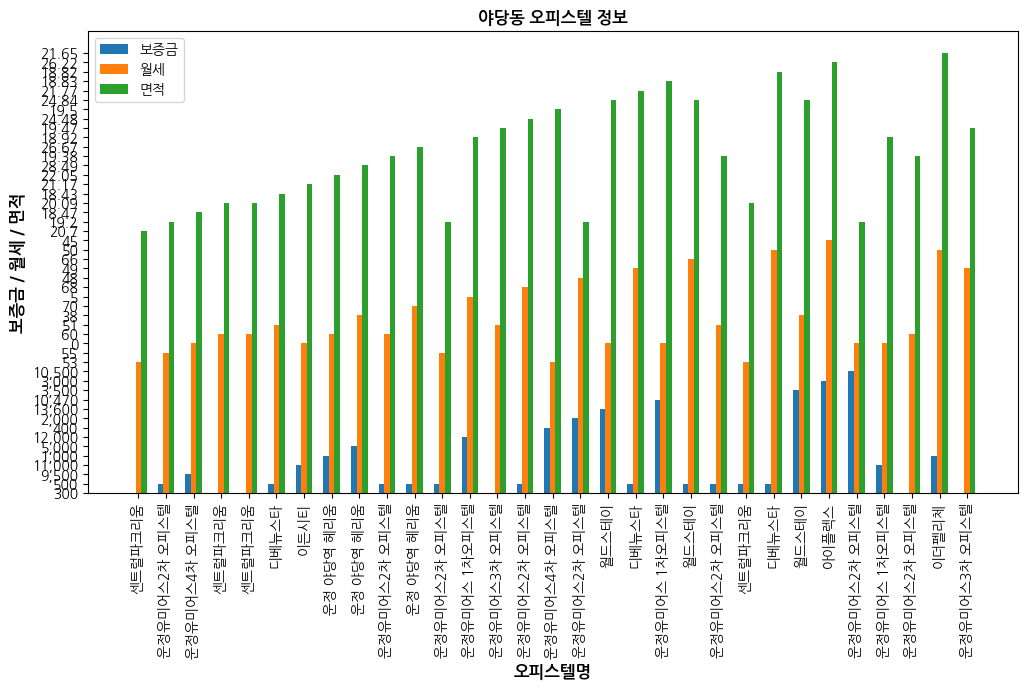

In [5]:
import numpy as np
import matplotlib.pyplot as plt

filtered_df = df[df['법정동'] == '야당동']

x = np.arange(len(filtered_df))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, filtered_df['보증금'], width, label='보증금')
rects2 = ax.bar(x, filtered_df['월세'], width, label='월세')
rects3 = ax.bar(x + width, filtered_df['전용면적'], width, label='면적')

ax.set_xlabel('오피스텔명', fontweight='bold', fontsize=12)
ax.set_ylabel('보증금 / 월세 / 면적', fontweight='bold', fontsize=12)
ax.set_title('야당동 오피스텔 정보', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(filtered_df['단지'], rotation=90)

ax.legend()
plt.show()


<ipython-input-6-6a703911869a>:38: UserWarning: The label '_nolegend_' of <matplotlib.patches.Rectangle object at 0x7f42ccc9dab0> starts with '_'. It is thus excluded from the legend.
  ax.legend(lines, labels)
<ipython-input-6-6a703911869a>:38: UserWarning: The label '_nolegend_' of <matplotlib.patches.Rectangle object at 0x7f42ccea1480> starts with '_'. It is thus excluded from the legend.
  ax.legend(lines, labels)


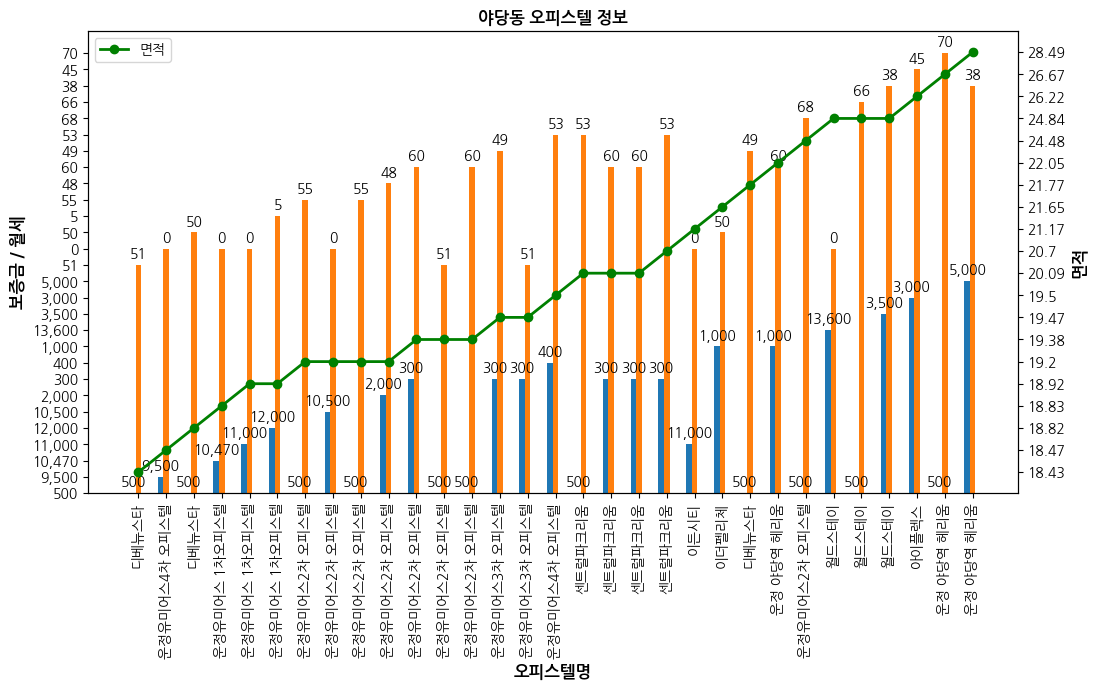

In [6]:
import numpy as np
import matplotlib.pyplot as plt

filtered_df = df[df['법정동'] == '야당동']
filtered_df = filtered_df.sort_values(by='전용면적')

x = np.arange(len(filtered_df))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, filtered_df['보증금'], width, label='보증금')
rects2 = ax.bar(x, filtered_df['월세'], width, label='월세')

ax.set_xlabel('오피스텔명', fontweight='bold', fontsize=12)
ax.set_ylabel('보증금 / 월세', fontweight='bold', fontsize=12)
ax.set_title('야당동 오피스텔 정보', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(filtered_df['단지'], rotation=90)

ax.legend()

# 오른쪽 y축 설정
ax2 = ax.twinx()
rects3 = ax2.plot(x, filtered_df['전용면적'], color='g', marker='o', linestyle='-', linewidth=2, label='면적')
ax2.set_ylabel('면적', fontweight='bold', fontsize=12)

# 수치 정렬
values = np.concatenate([filtered_df['보증금'], filtered_df['월세'], filtered_df['전용면적']])

# 라벨 추가
ax.bar_label(rects1, padding=3, label_type='edge', labels=filtered_df['보증금'].astype(str))
ax.bar_label(rects2, padding=3, label_type='edge', labels=filtered_df['월세'].astype(str))

# 범례 설정
lines = [rects1[0], rects2[0], rects3[0]]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels)

plt.show()


<ipython-input-23-b4fb9b74242b>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


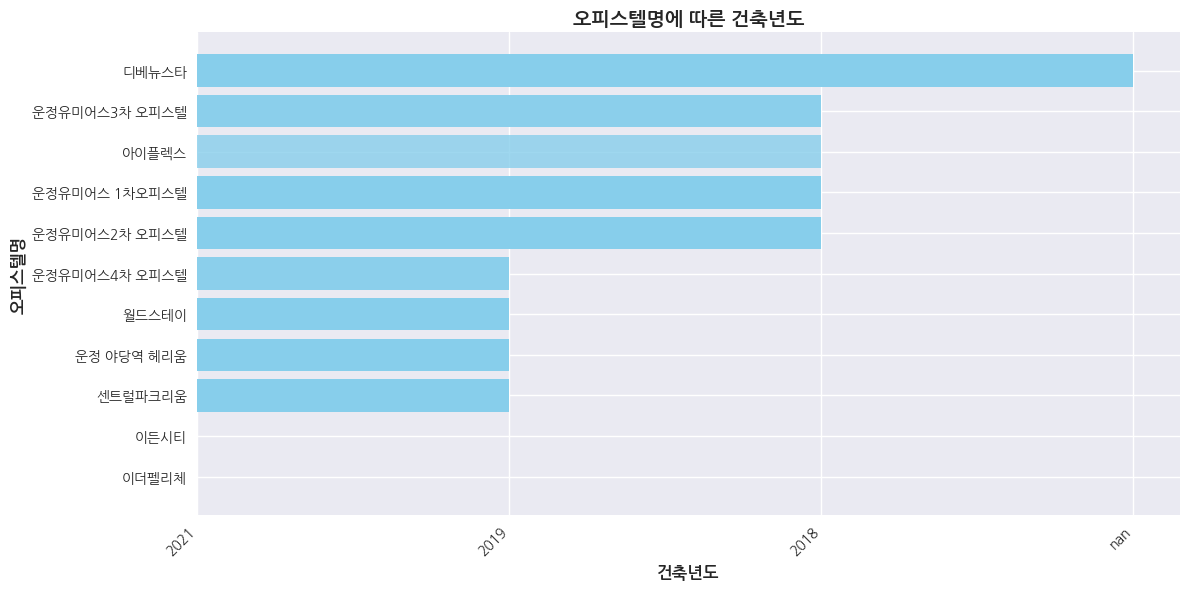

In [23]:
import matplotlib.pyplot as plt

filtered_df = df[df['법정동'] == '야당동']
filtered_df = filtered_df.sort_values(by='건축년도', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

x = filtered_df['단지']
y = filtered_df['건축년도'].astype(str)  # Convert to string

# 그래프 스타일 설정
plt.style.use('seaborn')

# 막대 그래프 그리기
ax.barh(x, y, color='skyblue', alpha=0.8)

# 축과 제목 설정
ax.set_xlabel('건축년도', fontweight='bold', fontsize=12)
ax.set_ylabel('오피스텔명', fontweight='bold', fontsize=12)
ax.set_title('오피스텔명에 따른 건축년도', fontweight='bold', fontsize=14)

# x축 눈금 라벨 설정
plt.xticks(rotation=45, ha='right')

# 그래프 여백 조정
plt.tight_layout()

plt.show()

